# LA Crime Study

I will be looking at the crimes and arrests data from Los Angeles Police Department (LAPD) and looking for some patterns. I am going to be answering the following questions:
*   What types of games sold the most in the 1980s vs the 2010s?
*   See if total sales are going on average

## Data Sources

The data source I've chosen is from 2020 to Present. 

[LA Crime data from data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present)

## Plan/Design/Methodology/etc.

Here is where I will explain exactly what I'll be doing with the data. I'll also include a few diagrams that represent some of the functions that I'll be creating.

## Code

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import chi2_contingency, ttest_ind

### Load & Display Data

In [2]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Display all columns
pd.set_option('display.max_columns', None)
# Show all rows
pd.set_option('display.max_rows', None)
df.head()
# print(df.head())          # Look at the first few rows
# print(df.info())          # Get data type and non-null count information
# print(df.describe(include='all'))  # Summary statistics for numeric and object columns


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [3]:
df.shape

(986873, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986873 entries, 0 to 986872
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           986873 non-null  int64  
 1   Date Rptd       986873 non-null  object 
 2   DATE OCC        986873 non-null  object 
 3   TIME OCC        986873 non-null  int64  
 4   AREA            986873 non-null  int64  
 5   AREA NAME       986873 non-null  object 
 6   Rpt Dist No     986873 non-null  int64  
 7   Part 1-2        986873 non-null  int64  
 8   Crm Cd          986873 non-null  int64  
 9   Crm Cd Desc     986873 non-null  object 
 10  Mocodes         839400 non-null  object 
 11  Vict Age        986873 non-null  int64  
 12  Vict Sex        846266 non-null  object 
 13  Vict Descent    846254 non-null  object 
 14  Premis Cd       986857 non-null  float64
 15  Premis Desc     986291 non-null  object 
 16  Weapon Used Cd  325035 non-null  float64
 17  Weapon Des

In [5]:
# Convert date columns to datetime
df['Date_Rptd_DT'] = pd.to_datetime(df['Date Rptd'])
df['Date_OCC_DT'] = pd.to_datetime(df['DATE OCC'])

# Convert numeric columns (like LAT/LON) to float if not already
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')

# Check and convert categorical columns
categorical_cols = ['AREA NAME', 'Crm Cd Desc', 'Status Desc', 'Premis Desc']
for c in categorical_cols:
    df[c] = df[c].astype('category')

In [6]:
missing_values = df.isnull().sum()
missing_values

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           147473
Vict Age               0
Vict Sex          140607
Vict Descent      140619
Premis Cd             16
Premis Desc          582
Weapon Used Cd    661838
Weapon Desc       661838
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          918239
Crm Cd 3          984577
Crm Cd 4          986813
LOCATION               0
Cross Street      834910
LAT                    0
LON                    0
Date_Rptd_DT           0
Date_OCC_DT            0
dtype: int64

In [7]:
# drop the most empty columns
df.drop(['Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street','Date Rptd','DATE OCC','Weapon Used Cd','Weapon Desc'], axis=1, inplace=True)

In [8]:
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

53448

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(933425, 22)

In [11]:
df.head(20)

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Date_Rptd_DT,Date_OCC_DT
0,190326475,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020-03-01,2020-03-01
1,200106753,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020-02-09,2020-02-08
2,200320258,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020-11-11,2020-11-04
3,200907217,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2023-05-10,2020-03-10
4,200412582,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130,2020-09-09,2020-09-09
5,200209713,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,2500 W 4TH ST,34.0642,-118.2771,2020-05-03,2020-05-02
6,200200759,1340,2,Rampart,265,1,648,ARSON,0329 1402 2004 1501,0,X,X,101.0,STREET,IC,Invest Cont,648.0,JAMES M WOOD,34.0536,-118.2788,2020-07-07,2020-07-07
7,201308739,1210,13,Newton,1333,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,3200 S SAN PEDRO ST,34.0170,-118.2643,2020-03-27,2020-03-27
8,201112065,2030,11,Northeast,1161,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,AA,Adult Arrest,510.0,KENMORE ST,34.0953,-118.2974,2020-07-31,2020-07-30
9,200121929,2300,1,Central,105,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,400 SOLANO AV,34.0710,-118.2302,2020-12-04,2020-12-03


In [12]:
# Check victim Age should be in between 0 to 100
if 'Vict Age' in df.columns:
    invalid_age_mask = (df['Vict Age'] < 0) | (df['Vict Age'] > 100)
    invalid_ages = df[invalid_age_mask]
    print("Invalid ages found:\n", invalid_ages[['Vict Age']])

    # Drop rows with invalid ages if necessary
    df = df[~invalid_age_mask]


Invalid ages found:
         Vict Age
112690       120
117450        -4
117582        -3
120963        -2
126210        -3
126744        -2
126857        -2
127582        -3
131332        -2
136380        -1
136757        -4
139731        -1
140545        -1
141826        -1
142672        -1
144741        -2
148317        -1
150250        -2
151323        -1
157189        -1
157294        -1
159172        -1
159198        -1
161711        -3
161850        -1
163246        -1
168435        -1
168600        -1
168655        -2
168901        -1
172678        -2
174802        -1
176788        -2
180894        -1
181063        -1
182012        -4
186615        -2
189546        -2
194130        -1
194800        -3
196183        -1
197314        -1
405390        -1
430295        -2
433738        -1
435784        -1
438821        -1
441722        -1
450711        -1
451637        -1
464074        -1
464885        -1
466363        -1
470963        -2
485747        -1
494773        -1
500106    

In [13]:
# Clean and Standardize String Fields
# Trim whitespace and convert crime description to upper case
df['Crm Cd Desc'] = df['Crm Cd Desc'].str.strip().str.upper()

# Standardize common terms if there are duplicates:
# "VEHICLE STOLEN" and "VEHICLE - STOLEN" should be the same
df['Crm Cd Desc'] = df['Crm Cd Desc'].replace({
    'VEHICLE STOLEN': 'VEHICLE - STOLEN'
})

# Fill the missing value with "X"
df['Vict Descent'] = df['Vict Descent'].fillna('X')
df['Vict Sex'] = df['Vict Sex'].fillna('X')

## 7. After Cleanup, Final Checks
# print(df.info())
# print("Final dataset shape:", df.shape)
# print("Sample rows after cleanup:")
# print(df.head())

In [14]:
df.shape

(933338, 22)

In [15]:
missing_values = df.isnull().sum()
missing_values

DR_NO                0
TIME OCC             0
AREA                 0
AREA NAME            0
Rpt Dist No          0
Part 1-2             0
Crm Cd               0
Crm Cd Desc          0
Mocodes         140140
Vict Age             0
Vict Sex             0
Vict Descent         0
Premis Cd           15
Premis Desc        570
Status               1
Status Desc          0
Crm Cd 1            11
LOCATION             0
LAT                  0
LON                  0
Date_Rptd_DT         0
Date_OCC_DT          0
dtype: int64

In [16]:
df.sample(10)

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Date_Rptd_DT,Date_OCC_DT
817153,230609133,2230,6,Hollywood,645,1,352,PICKPOCKET,1822 0344 0377,20,F,V,102.0,SIDEWALK,IC,Invest Cont,352.0,6800 HOLLYWOOD BL,34.1016,-118.3387,2023-04-29,2023-04-28
456730,221016232,1400,10,West Valley,1075,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0400 1310 2000 0913 1814 0444 0416,43,F,O,101.0,STREET,IC,Invest Cont,626.0,17800 VENTURA BL,34.1629,-118.5202,2022-11-08,2022-11-07
97714,200314337,300,3,Southwest,375,1,310,BURGLARY,1202 0344 0377,64,F,W,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,1600 MIDDLETON PL,34.0155,-118.3089,2020-07-18,2020-07-18
601543,220113493,300,1,Central,162,1,510,VEHICLE - STOLEN,NaN,0,X,X,108.0,PARKING LOT,IC,Invest Cont,510.0,HILL ST,34.0445,-118.2558,2022-06-03,2022-06-03
257628,210308713,1600,3,Southwest,331,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,X,X,101.0,STREET,IC,Invest Cont,420.0,3400 FARMDALE AV,34.0283,-118.3492,2021-04-13,2021-04-05
629176,220619734,1615,6,Hollywood,645,2,624,BATTERY - SIMPLE ASSAULT,0446 1822 2004 0400 0416,33,M,H,101.0,STREET,IC,Invest Cont,624.0,SYCAMORE,34.1004,-118.3434,2022-12-05,2022-12-05
839402,230618249,1310,6,Hollywood,668,1,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 0325 0378,0,X,X,203.0,OTHER BUSINESS,IC,Invest Cont,440.0,5500 W SUNSET BL,34.0981,-118.3092,2023-11-25,2023-11-25
380433,211507903,1225,15,N Hollywood,1549,1,210,ROBBERY,0344 0302 2004 1822 0312 0906,24,M,H,102.0,SIDEWALK,IC,Invest Cont,210.0,CASE AV,34.1700,-118.3719,2021-04-11,2021-04-11
163876,201408050,2200,14,Pacific,1497,1,510,VEHICLE - STOLEN,NaN,0,X,X,108.0,PARKING LOT,AO,Adult Other,510.0,5200 W CENTURY BL,33.9454,-118.3701,2020-03-11,2020-03-10
596397,221411244,500,14,Pacific,1434,1,510,VEHICLE - STOLEN,NaN,0,X,X,101.0,STREET,IC,Invest Cont,510.0,3700 MOORE ST,34.0030,-118.4426,2022-05-22,2022-05-18


In [21]:
# Show different crimes
# unique_crimes = df['Crm Cd Desc'].unique()
# print(unique_crimes)
crime_desc_counts = df['Crm Cd Desc'].value_counts()
crime_desc_counts

VEHICLE - STOLEN                                            106545
BATTERY - SIMPLE ASSAULT                                     70347
BURGLARY FROM VEHICLE                                        58976
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      57058
THEFT OF IDENTITY                                            56699
BURGLARY                                                     54257
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               49977
THEFT PLAIN - PETTY ($950 & UNDER)                           49599
INTIMATE PARTNER - SIMPLE ASSAULT                            43144
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              37941
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          34244
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     32501
ROBBERY                                                      30424
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     28951
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     2

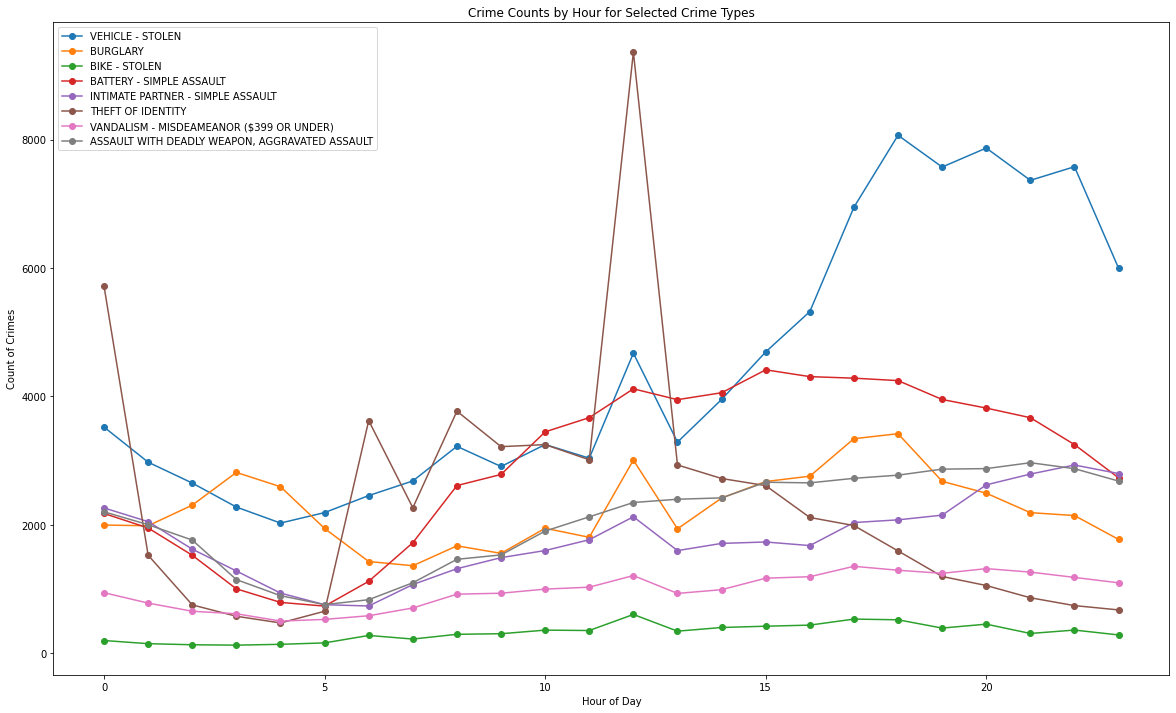

In [24]:
# Convert TIME OCC to an hour if it is in a string format like "2130" meaning 21:30
df['TIME_OCC_STR'] = df['TIME OCC'].astype(str).str.zfill(4)  
df['HOUR'] = df['TIME_OCC_STR'].str[:2].astype(int)

# Group by crime code description and hour
hourly_counts = df.groupby(['Crm Cd Desc', 'HOUR']).size().reset_index(name='count')

crime_types_of_interest = ["VEHICLE - STOLEN", "BURGLARY", "BIKE - STOLEN", "BATTERY - SIMPLE ASSAULT", "INTIMATE PARTNER - SIMPLE ASSAULT","THEFT OF IDENTITY","VANDALISM - MISDEAMEANOR ($399 OR UNDER)","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"]
filtered = hourly_counts[hourly_counts['Crm Cd Desc'].isin(crime_types_of_interest)]

# Plot using matplotlib directly
plt.figure(figsize=(20,12))
for crime_type in crime_types_of_interest:
    subset = filtered[filtered['Crm Cd Desc'] == crime_type]
    plt.plot(subset['HOUR'], subset['count'], marker='o', label=crime_type)

plt.title("Crime Counts by Hour for Selected Crime Types")
plt.xlabel("Hour of Day")
plt.ylabel("Count of Crimes")
plt.legend()
plt.show()